In [9]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [10]:
data_path = "my data"

### Removing Images with Unnecessary formats

In [11]:
img_format = ['jpg', 'jpeg', 'png', 'bmp']

In [12]:
for img_category in os.listdir(data_path):
    for img in os.listdir(os.path.join(data_path, img_category)):
        img_path = os.path.join(data_path, img_category, img)
        
        img_type = img.split(".")[-1] # taking the extension of an image
        if img_type not in img_format:
            os.remove(img_path) # removing an images if their extension does't included in img_format
        

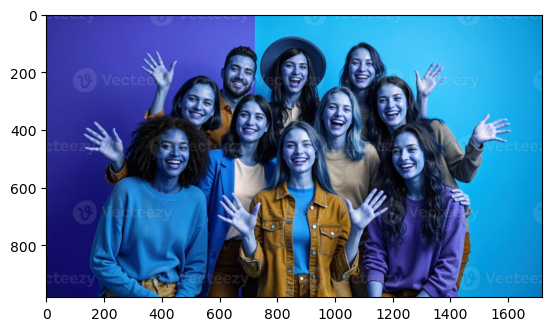

In [92]:
# let test one image

test_img = cv2.imread(os.path.join(data_path, "happy people", os.listdir(os.path.join(data_path, "happy people"))[2]))
plt.imshow(test_img)
# the reason for the change of an image color is, matplotlib read images as RGB, but cv2 read as BGR, so we need to format it properly

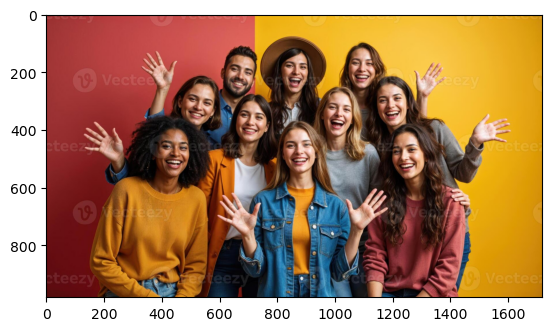

In [93]:
#RGB converted image
test_img_new = test_img = cv2.imread(os.path.join(data_path, "happy people", os.listdir(os.path.join(data_path, "happy people"))[2]))
test_img_new = cv2.cvtColor(test_img_new, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_new)

#### Loading our data

In [13]:
# automatically read our datasets
my_data1 = tf.keras.utils.image_dataset_from_directory("my data")

Found 180 files belonging to 2 classes.


In [117]:
#allows to access a generator from data pipeline
numpy_iterator1 = my_data1.as_numpy_iterator()

In [118]:
# returns the data and the label
batch = numpy_iterator1.next()

# so batch[0] is the image array and batch[1] is the label( 'happy' or 'sad')

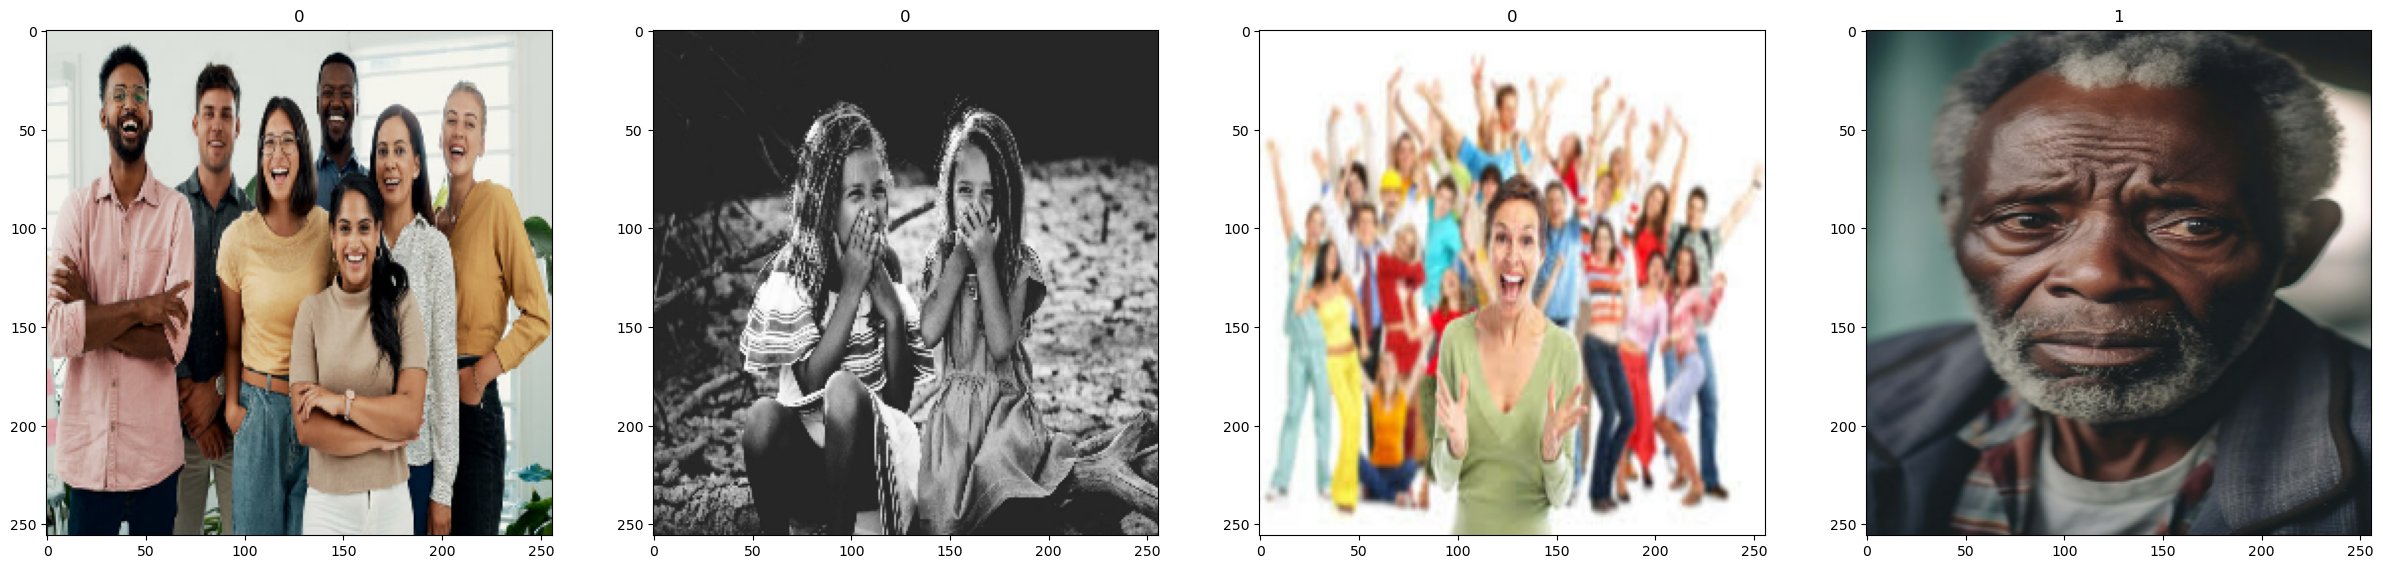

In [119]:
fig, ax=plt.subplots(ncols=4, figsize=(30,30))

for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])
# In this case 0 represent happy  and 1 represents sad

## Data Preprocessing

##### Standardization

In [17]:
my_data2 = my_data1.map(lambda x, y:(x/255, y))

In [18]:
numpy_iterator2 = my_data2.as_numpy_iterator()

In [19]:
batch2 = numpy_iterator2.next()

In [20]:
batch2[0].max()

1.0

In [21]:
batch2[0].min()

0.0

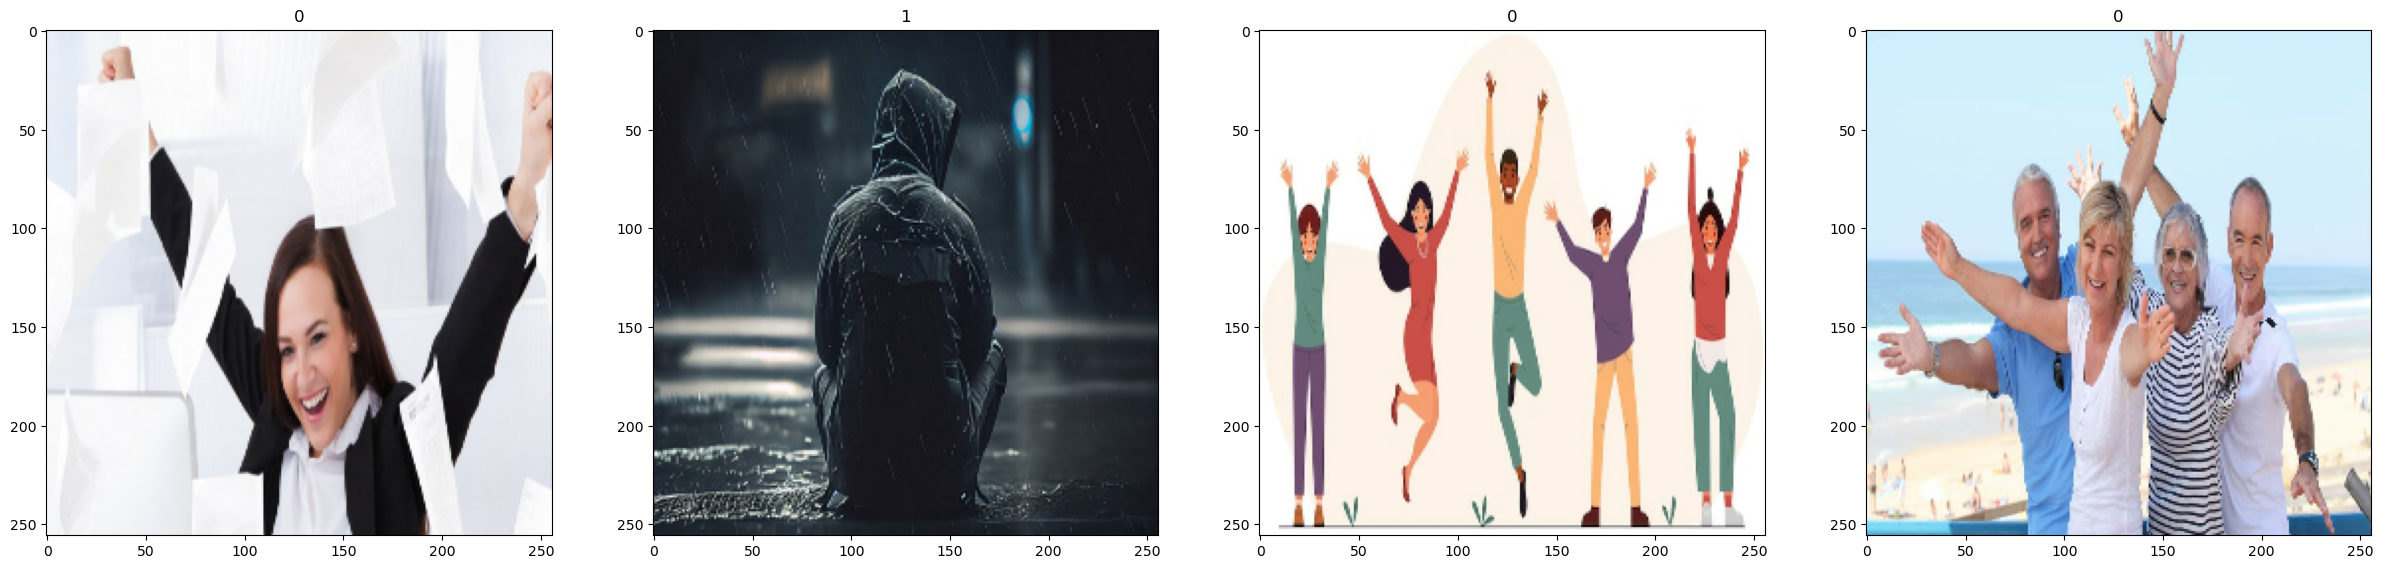

In [22]:
fig, ax=plt.subplots(ncols=4, figsize=(30,30))

for index, img in enumerate(batch2[0][:4]):
    ax[index].imshow(img)
    ax[index].title.set_text(batch2[1][index])
# In this case 0 represent happy  and 1 represents sad

### Split the Data

In [23]:
# we gonna split the data into training, validating, and testing sets 80, 10, 10 respectively
data_size = len(my_data2)
train_size = int(data_size*.7)
val_size  = int(data_size*.1) + 1
test_size = int(data_size*.1) + 1

In [24]:
train = my_data2.take(train_size)
val = my_data2.skip(train_size).take(val_size)
test = my_data2.skip(train_size + val_size).take(test_size)

## Model Building

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [31]:
#define the model
model = Sequential()

In [32]:
#building the model
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation="relu", input_shape=(256, 256, 3) )) # input layer with 16 filters, 3x3 pixels
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPool2D())

model.add(Flatten()) # convert the 2D into 1D
model.add(Dense(256, activation="relu")) #fully connected dense layer
model.add(Dense(1, activation="sigmoid")) #output layer

In [33]:
model.compile??

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    loss_weights=None,
    metrics=None,
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile='auto',
    auto_scale_loss=True,
)
Source:   
    @traceback_utils.filter_traceback
    @tracking.no_automatic_dependency_tracking
    def compile(
        self,
        optimizer="rmsprop",
        loss=None,
        loss_weights=None,
        metrics=None,
        weighted_metrics=None,
        run_eagerly=False,
        steps_per_execution=1,
        jit_compile="auto",
        auto_scale_loss=True,
    ):
        """Configures the model for training.

        Example:

        ```python
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss=keras.losses.BinaryCrossentropy(),
            metrics=[
                keras.metrics.BinaryAccuracy(),
                keras.metrics.FalseNegatives(),
            ],
        )
        ```

       

In [34]:
#compiling the model
# we are going to use Binary_Cross_Entropy, because our output will be binary

model.compile(optimizer="adam", loss="Binary_Cross_Entropy", metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)